In [281]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from os import environ

filename = environ['input_data_fp']
fig_no = int(environ['input_fig_number'])
fig_no = 30
if fig_no == 1:
    fig_size = 10
else:
    fig_size = 30

pd.options.display.float_format = '{:10,.2f}'.format
pd.set_option('display.width', 999)

key_index = ['actual_paint_frames',
            'expected_frames', 
            'frame_throughput',
            'long_frame']

with open(filename) as data_file:
    data = json.load(data_file)
fps = data["video-recording-fps"]
remove_data = ["video-recording-fps"]
for item in remove_data:
    del data[item]
cols = list()
d = pd.DataFrame(data)
for col in d:
    cols.append(str(col))

cols[0]

'test_chrome_facebook_ft_type_composerbox_100_txt_delay_50ms'

In [240]:
df = pd.concat([pd.DataFrame(d.loc[:, cols[0]]['time_list']).T], axis=1)
dft = df.loc[key_index, :]
dft

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
actual_paint_frames,75,72,74,73,72,74,72,74,75,73,...,74,72,74,72,72,76,72,77,75,72
expected_frames,629,629,629,629,629,629,629,629,629,629,...,627,629,629,629,629,629,629,629,629,629
frame_throughput,0.12,0.11,0.12,0.12,0.11,0.12,0.11,0.12,0.12,0.12,...,0.12,0.11,0.12,0.11,0.11,0.12,0.11,0.12,0.12,0.11
long_frame,288.89,288.89,277.78,288.89,288.89,288.89,288.89,288.89,277.78,277.78,...,288.89,277.78,288.89,288.89,288.89,288.89,288.89,288.89,288.89,277.78


In [241]:
cols[1]

'test_firefox_facebook_ft_type_composerbox_100_txt_delay_50ms'

In [242]:
df = pd.concat([pd.DataFrame(d.loc[:, cols[1]]['time_list']).T], axis=1)
dft = df.loc[key_index, :]
dft

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
actual_paint_frames,65,63,64,64,61,62,61,66,62,63,...,63,61,62,64,63,62,65,62,65,61
expected_frames,630,630,629,631,627,627,625,631,629,628,...,630,629,631,630,630,629,630,630,627,631
frame_throughput,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,...,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
long_frame,300.00,455.56,288.89,400.00,411.11,400.00,300.00,288.89,355.56,288.89,...,300.00,300.00,433.33,288.89,433.33,422.22,300.00,300.00,288.89,411.11


In [282]:
non_freeze_frame_timestamps = pd.concat([pd.DataFrame(d[column]['time_list']) for column in d], axis=1).loc[:,'non_freeze_frame_timestamps']
non_freeze_frame_timestamps.columns = d.columns
case_name_list = list(non_freeze_frame_timestamps)

case = case_name_list[0]
c = non_freeze_frame_timestamps[case]
frame = pd.DataFrame([pd.Series(i).diff()
                                  .dropna()
                                  .apply(lambda x: np.round(x/11.11)) for i in c]).T


In [244]:
str(case)

'test_chrome_facebook_ft_type_composerbox_100_txt_delay_50ms'

In [4]:
frame.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], interpolation='nearest')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.05,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.25,4.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,5.00,6.00,6.00,2.00,6.00,3.00,6.00,5.00
0.50,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
0.75,9.00,9.00,9.00,9.00,9.00,9.00,10.00,9.00,9.00,9.00,...,9.00,9.00,9.00,10.00,9.00,11.00,9.00,8.00,9.00,9.00
0.95,19.00,24.00,20.00,20.00,20.00,19.00,20.00,20.00,20.00,18.00,...,19.00,20.00,19.00,20.00,20.00,19.00,24.00,19.00,19.00,19.00
0.99,26.00,25.00,25.00,26.00,25.00,25.00,26.00,26.00,25.00,25.00,...,26.00,25.00,26.00,26.00,26.00,26.00,26.00,26.00,25.00,25.00


In [5]:
frame.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,74.00,71.00,73.00,72.00,71.00,73.00,71.00,73.00,74.00,72.00,...,73.00,71.00,73.00,71.00,71.00,75.00,71.00,76.00,74.00,71.00
mean,7.55,7.86,7.66,7.76,7.87,7.66,7.83,7.63,7.53,7.75,...,7.63,7.87,7.66,7.83,7.87,7.45,7.87,7.36,7.55,7.86
std,5.79,6.22,5.80,6.07,6.02,6.01,6.06,6.04,5.72,5.59,...,5.75,5.68,6.07,6.07,5.74,6.11,6.27,5.83,5.78,5.89
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,4.50,5.00,5.00,5.75,6.00,6.00,5.50,6.00,6.00,6.00,...,6.00,6.00,5.00,5.50,6.00,2.50,5.00,2.75,6.00,5.00
50%,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
75%,8.75,10.50,9.00,9.75,10.50,9.00,11.00,9.00,8.75,9.75,...,9.00,10.50,9.00,11.00,10.50,9.50,10.50,8.25,8.75,10.50
max,26.00,26.00,25.00,26.00,26.00,26.00,26.00,26.00,25.00,25.00,...,26.00,25.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,25.00


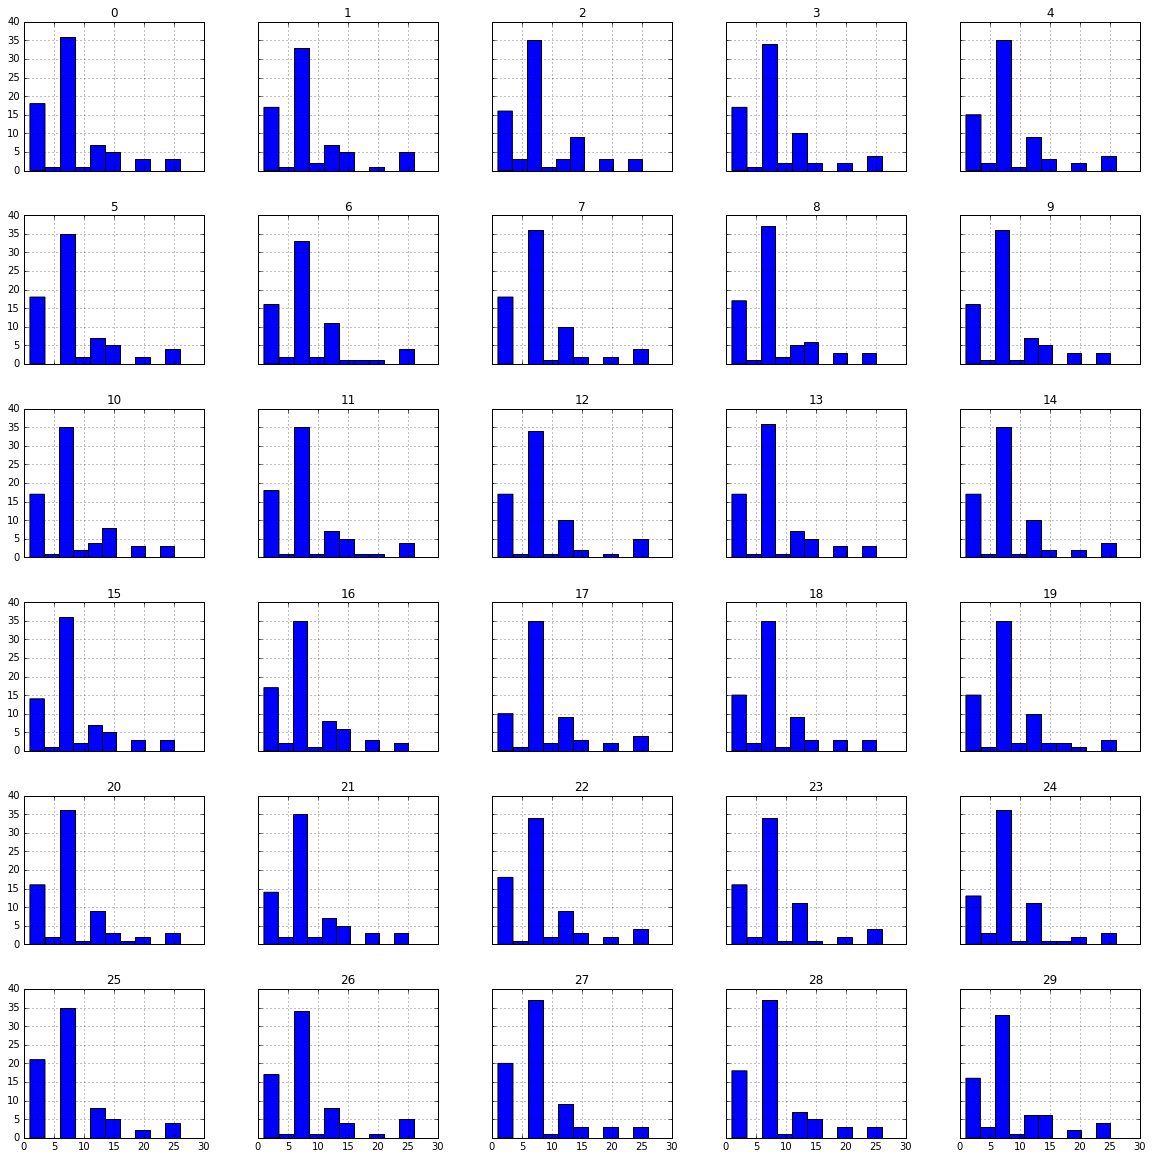

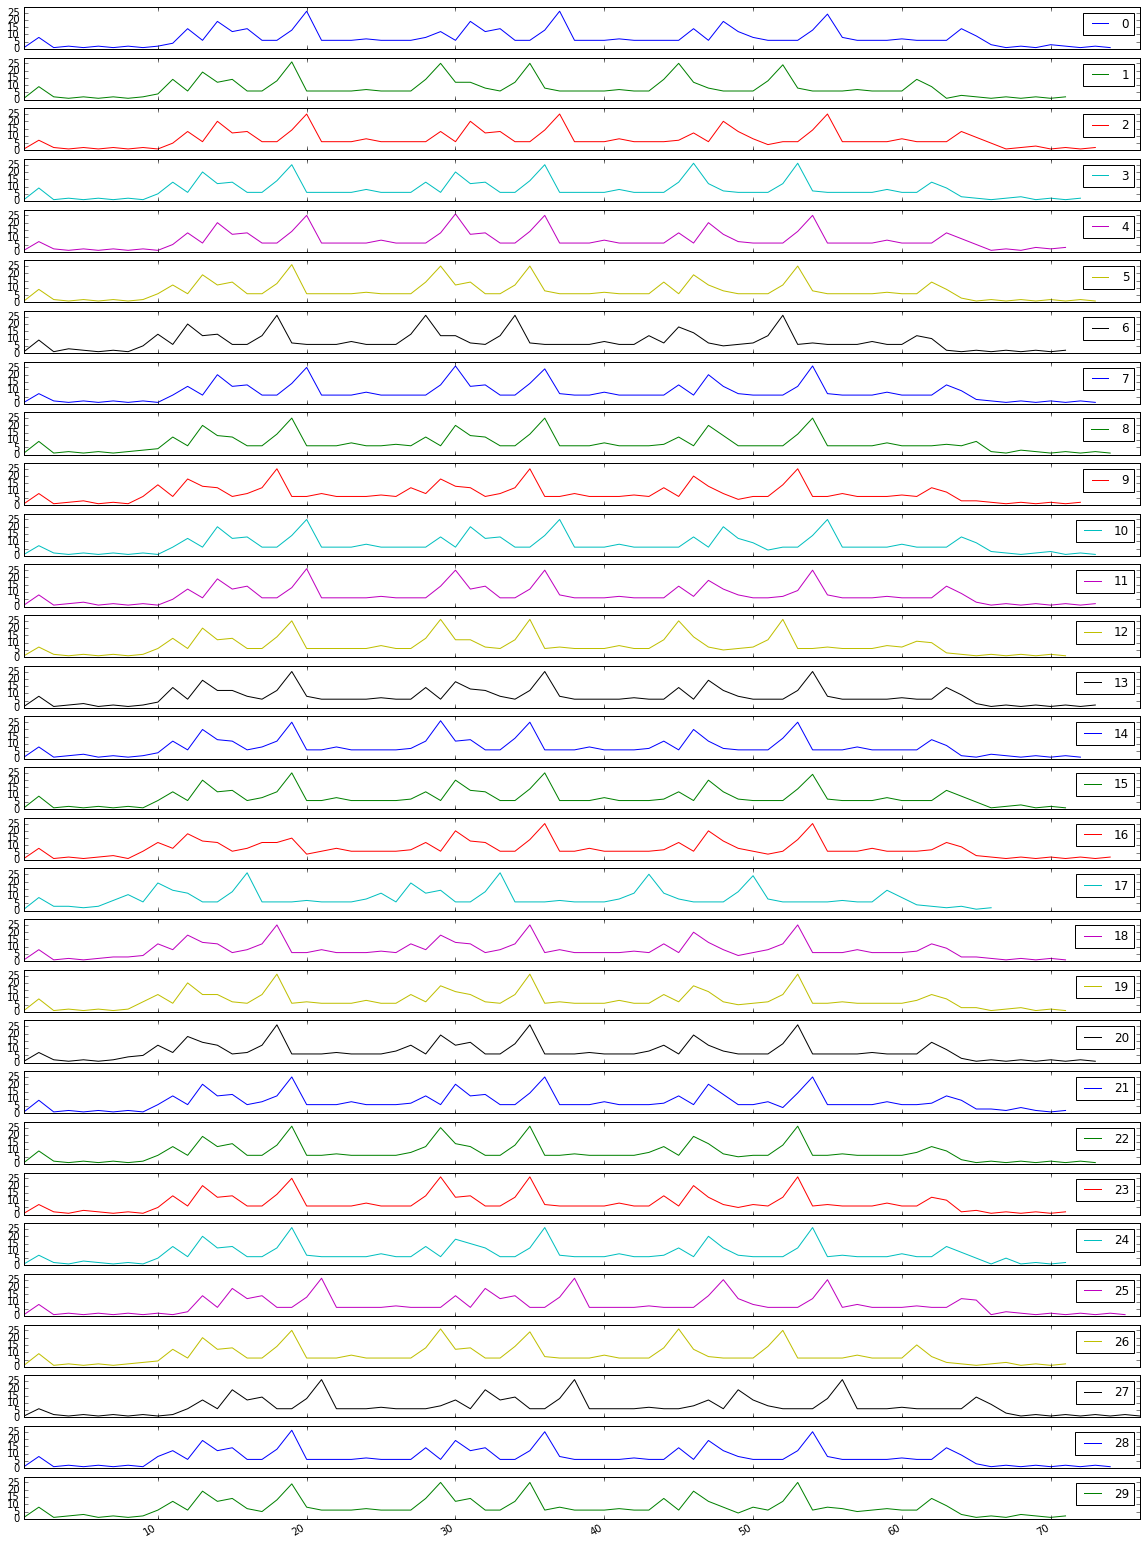

In [284]:
max_y = 0
for col in frame:
    if max(frame[col]) > max_y:
        max_y = max(frame[col])
frame.hist( layout=(6,5), sharey=True, sharex=True, figsize=(20,20))
frame.plot(subplots=True, layout=(fig_no,1), figsize=(20,30), ylim=(0,round(max_y*1.1)))
plt.show()

In [6]:
sum(frame.corr().cumsum().T[frame.shape[1]-1])

450.9773821354496

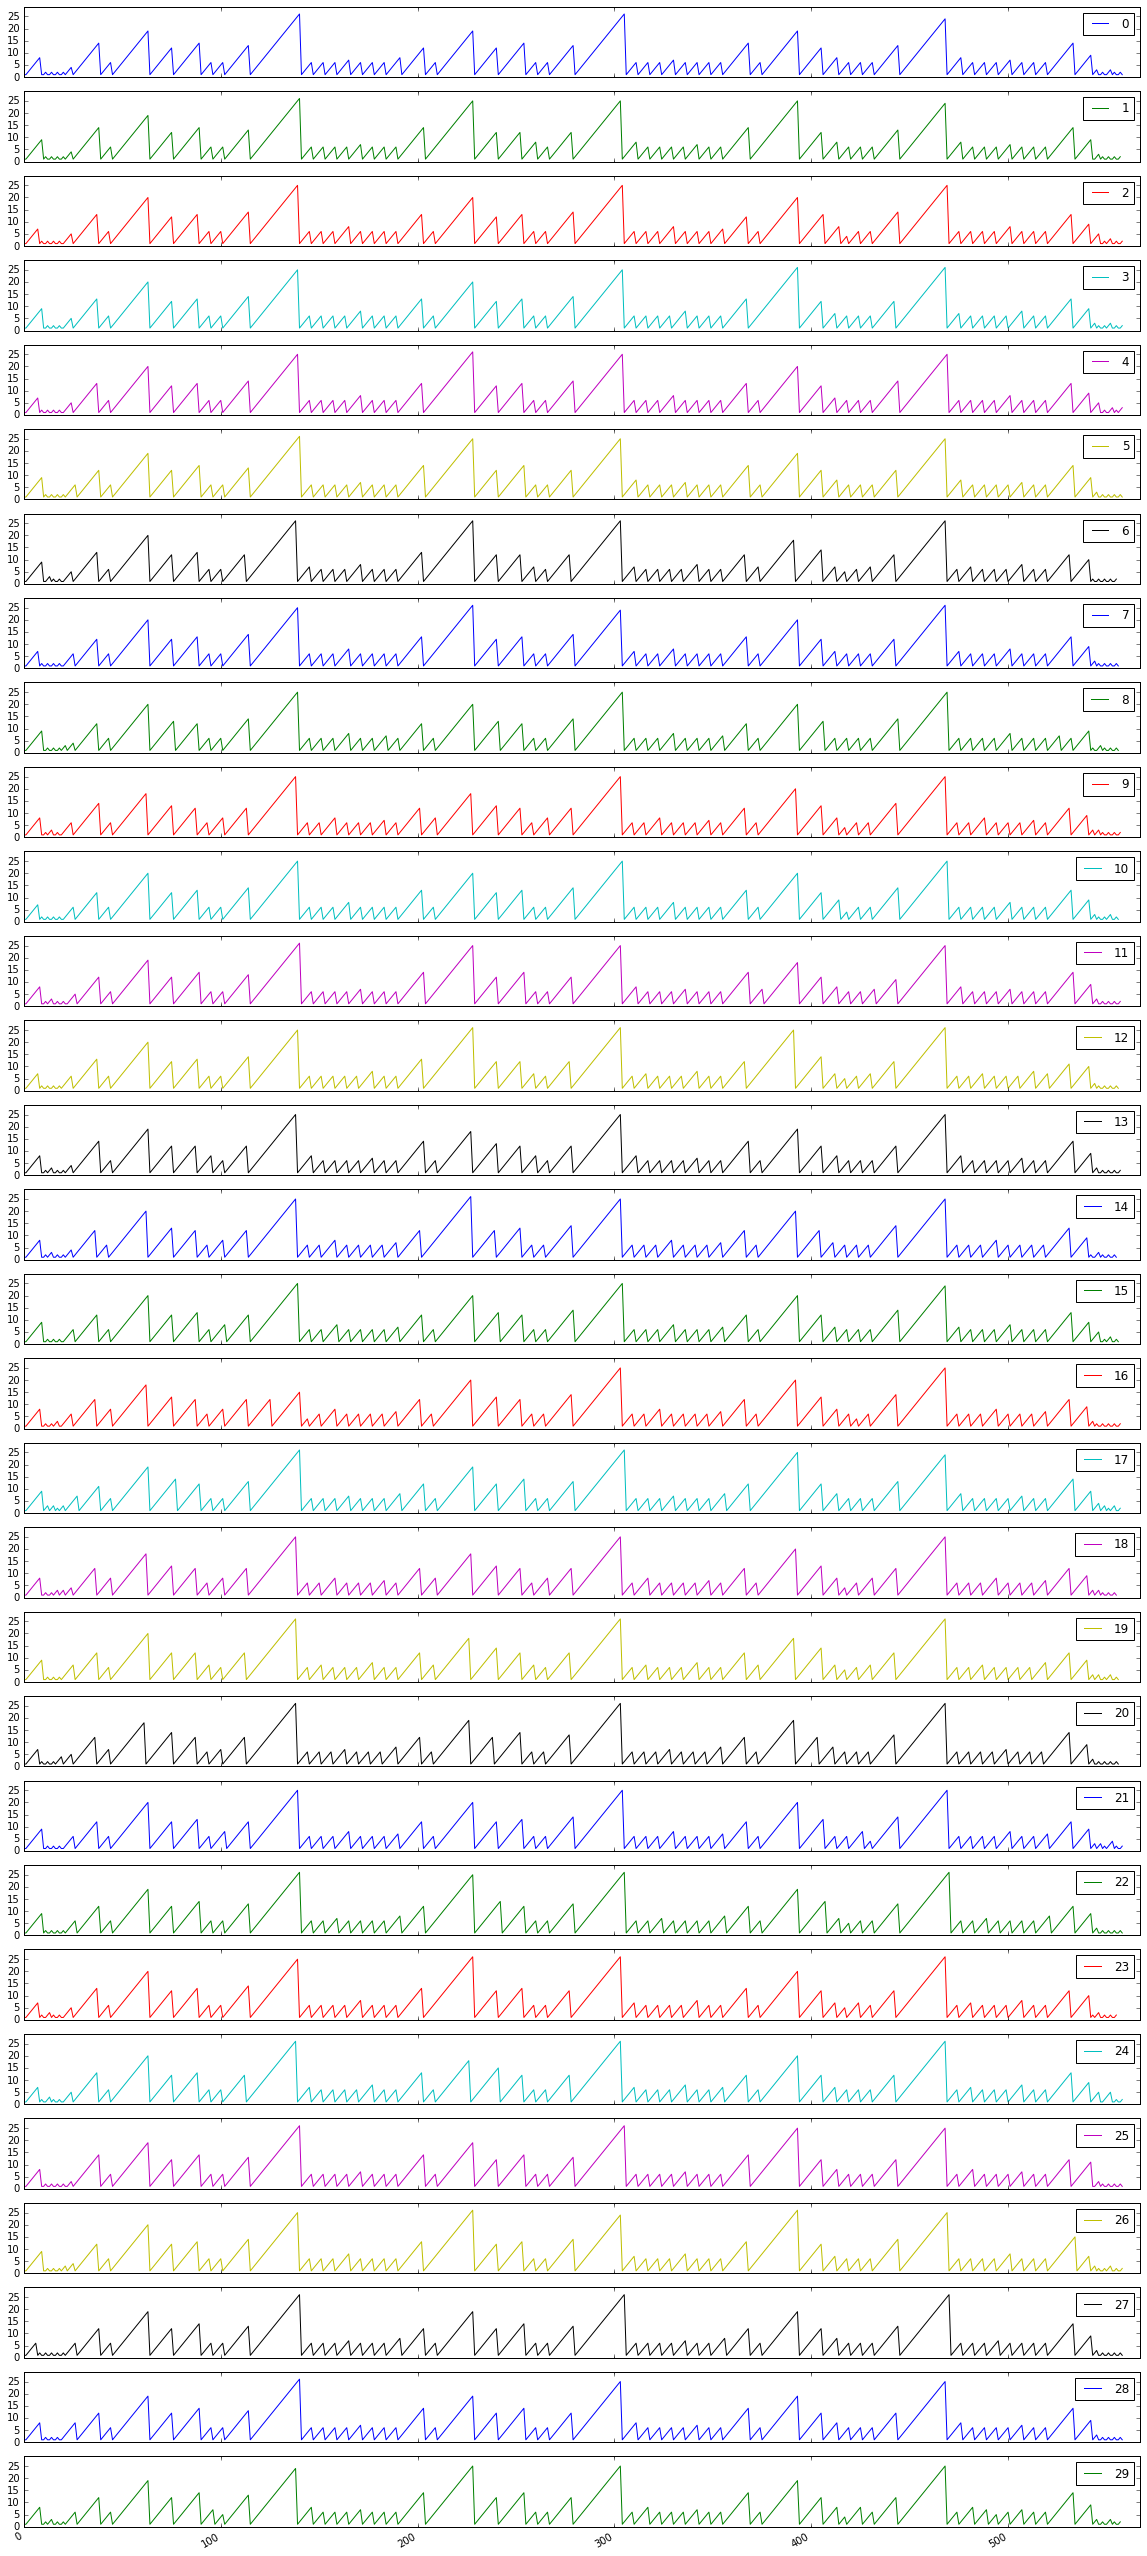

In [287]:
out_data = []
for col in frame:
    data = []
    new_data = []
    for num_dup_frame in frame[col]:
        if num_dup_frame > 1:
            data.append(pd.Series(list(np.arange(1, num_dup_frame + 1))))
        else:
            data.append(pd.Series([num_dup_frame]))
    new_data = pd.concat(data, ignore_index=True)
    out_data.append(new_data)
out_data = pd.concat(out_data, ignore_index=True, axis=1)
out_data.plot(subplots=True, layout=(fig_no,1), figsize=(20,50), ylim=(0,round(max_y*1.1)))
plt.show()

In [279]:
case = case_name_list[1]
c = non_freeze_frame_timestamps[case]
frame = pd.DataFrame([pd.Series(i).diff()
                                  .dropna()
                                  .apply(lambda x: np.round(x/11.11)) for i in c]).T


In [247]:
str(case)

'test_firefox_facebook_ft_type_composerbox_100_txt_delay_50ms'

In [9]:
frame.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], interpolation='nearest')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.05,2.00,1.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,...,2.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,1.00,2.00
0.25,4.00,5.00,5.00,6.00,5.00,5.00,5.00,4.00,4.00,5.00,...,5.00,6.00,6.00,5.00,5.00,6.00,6.00,5.00,5.00,5.00
0.50,6.00,7.00,7.00,6.00,7.00,6.00,7.00,6.00,6.00,6.00,...,7.00,7.00,6.00,7.00,6.00,7.00,6.00,7.00,6.00,6.00
0.75,12.00,10.00,12.00,12.00,11.00,11.00,12.00,12.00,12.00,12.00,...,12.00,12.00,12.00,12.00,12.00,11.00,12.00,12.00,12.00,12.00
0.95,25.00,26.00,25.00,25.00,25.00,22.00,26.00,24.00,26.00,25.00,...,25.00,25.00,25.00,25.00,25.00,26.00,25.00,26.00,25.00,26.00
0.99,26.00,27.00,26.00,27.00,26.00,25.00,26.00,25.00,27.00,26.00,...,26.00,26.00,27.00,26.00,26.00,26.00,26.00,26.00,25.00,28.00


In [10]:
frame.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,64.00,62.00,63.00,63.00,60.00,61.00,60.00,65.00,61.00,62.00,...,62.00,60.00,61.00,63.00,62.00,61.00,64.00,61.00,64.00,60.00
mean,8.73,9.06,8.89,8.90,9.33,9.16,9.30,8.60,9.18,9.02,...,9.06,9.32,9.16,8.84,8.98,9.20,8.73,9.13,8.70,9.35
std,6.64,7.52,6.27,6.93,7.10,6.82,6.80,6.40,7.03,6.72,...,6.41,6.68,7.25,6.31,7.28,7.28,6.62,6.68,6.50,7.43
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,4.00,5.00,5.00,6.00,5.00,5.00,5.00,4.00,4.00,5.00,...,5.00,6.00,6.00,5.00,5.25,6.00,5.75,5.00,5.00,5.00
50%,6.00,7.00,7.00,6.00,7.00,6.00,7.00,6.00,6.00,6.00,...,7.00,7.00,6.00,7.00,6.00,7.00,6.00,7.00,6.00,6.00
75%,12.25,10.00,12.00,12.00,11.25,11.00,12.00,12.00,12.00,12.00,...,11.75,12.00,12.00,12.00,12.00,11.00,12.00,12.00,12.00,12.00
max,27.00,41.00,26.00,36.00,37.00,36.00,27.00,26.00,32.00,26.00,...,27.00,27.00,39.00,26.00,39.00,38.00,27.00,27.00,26.00,37.00


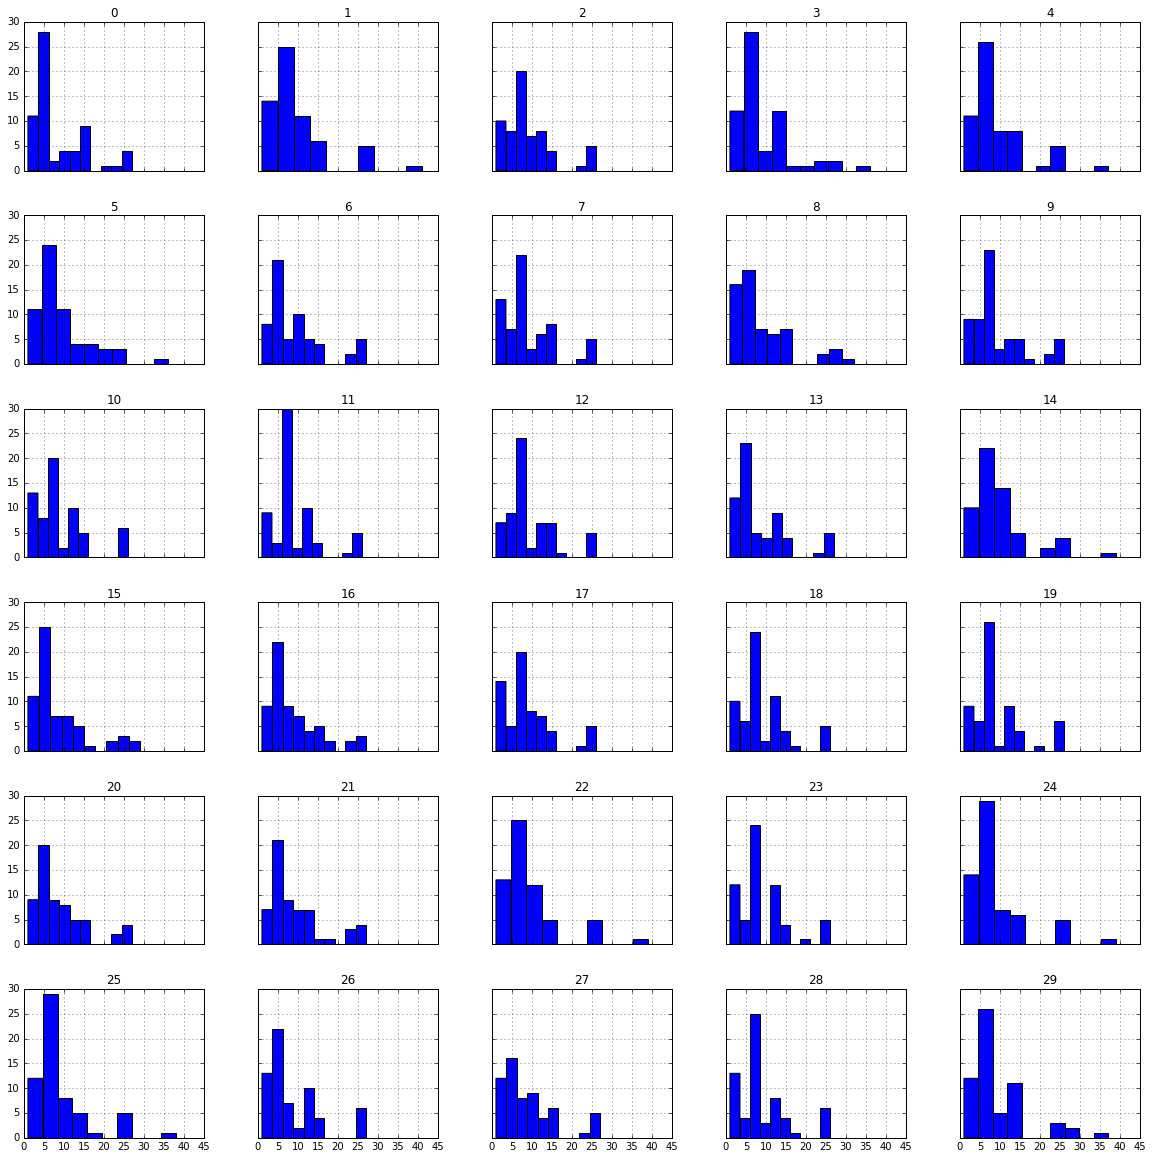

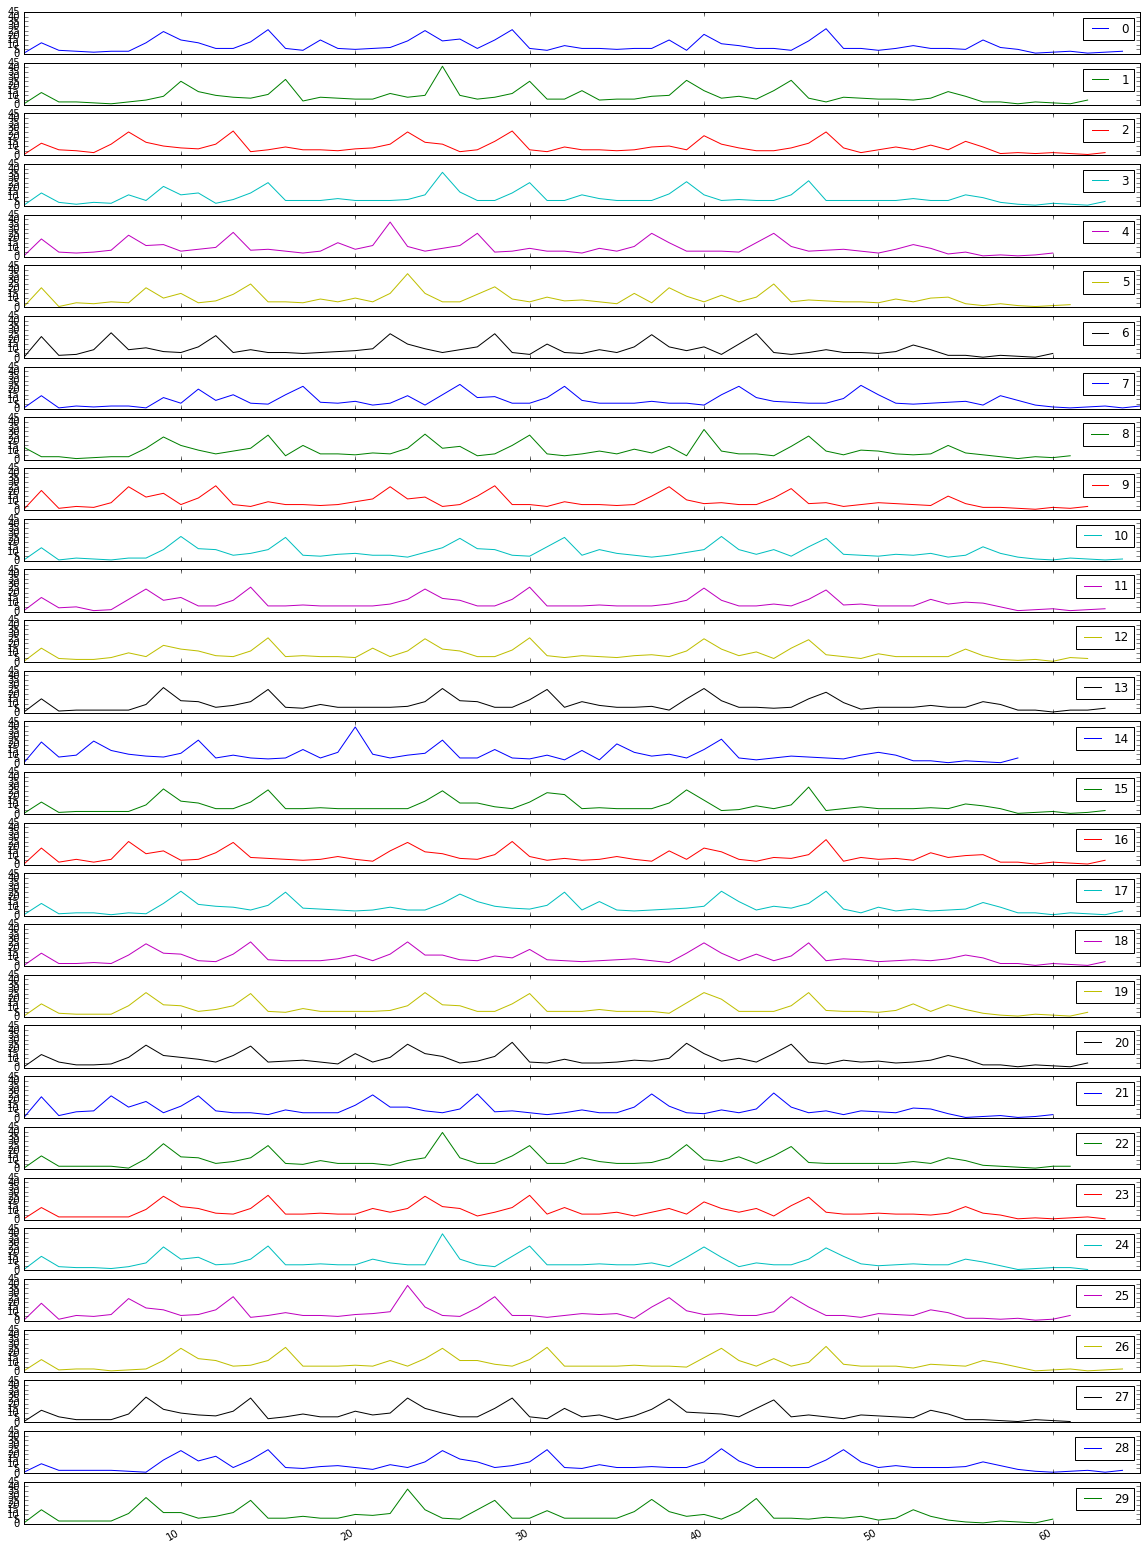

In [280]:
max_y = 0
for col in frame:
    if max(frame[col]) > max_y:
        max_y = max(frame[col])
frame.hist( layout=(6,5), sharey=True, sharex=True, figsize=(20,20))
frame.plot(subplots=True, layout=(fig_no,1), figsize=(20,30), ylim=(0,round(max_y*1.1)))
plt.show()

In [11]:
sum(frame.corr().cumsum().T[frame.shape[1]-1])

279.98485495242193

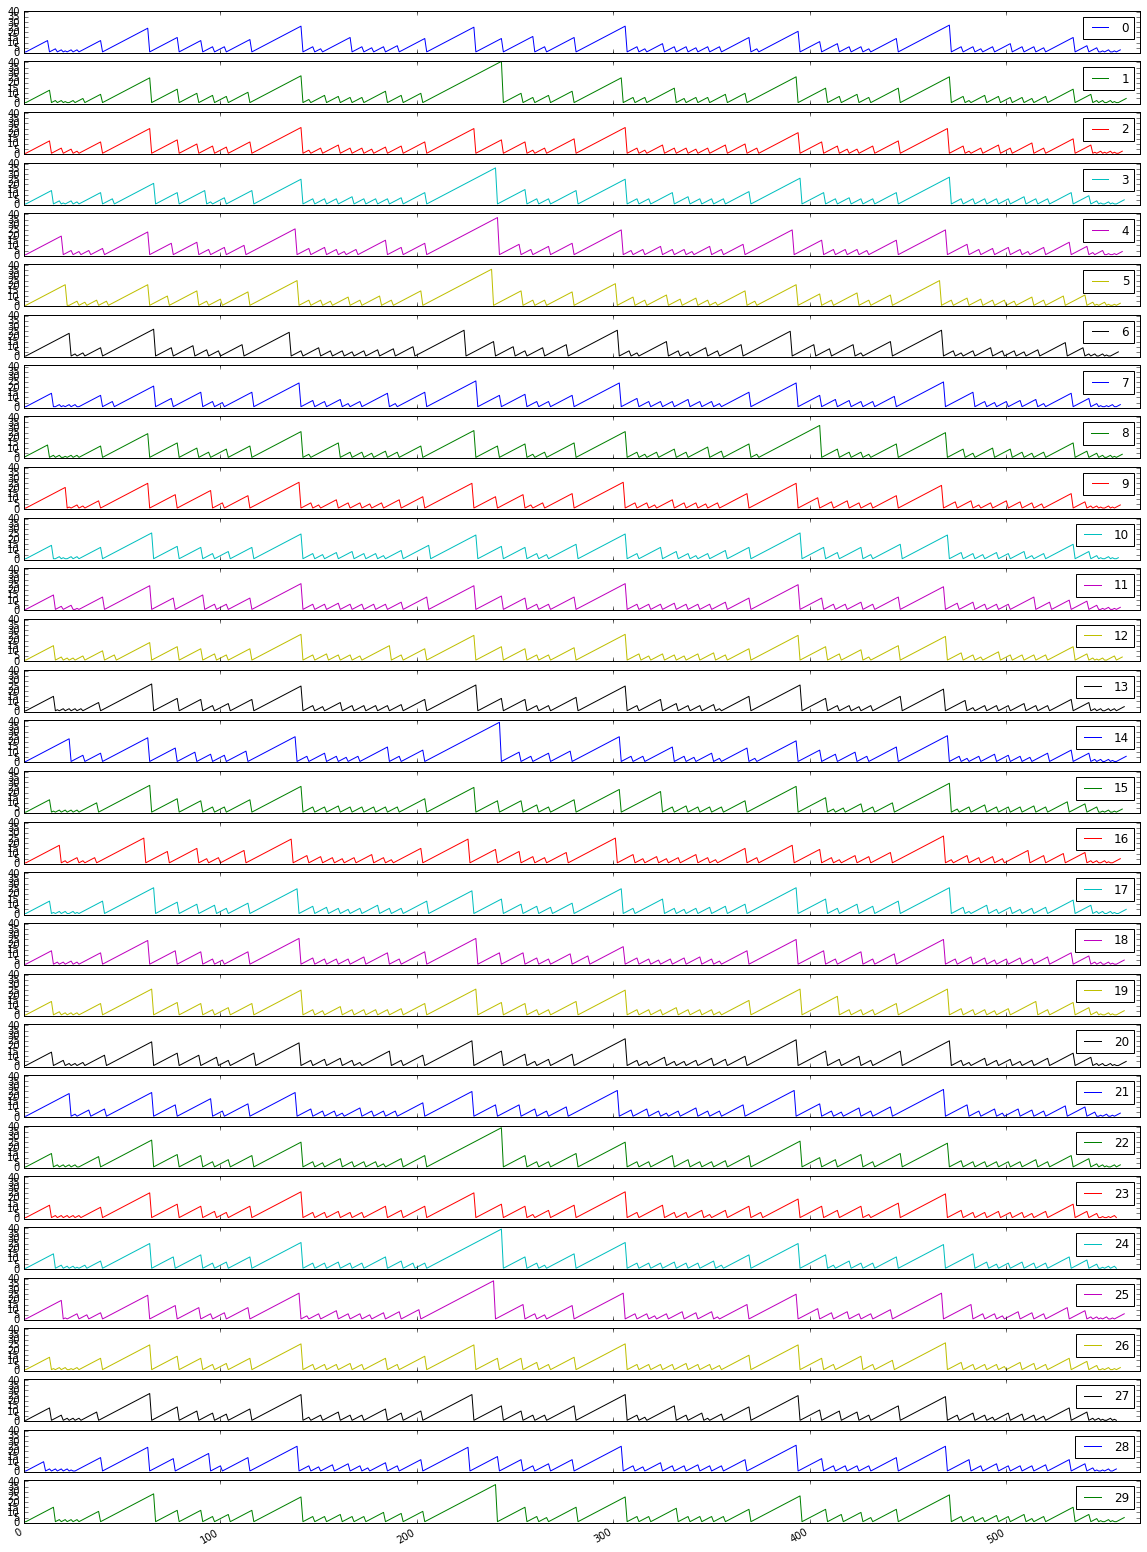

In [278]:
out_data = []
for col in frame:
    data = []
    new_data = []
    for num_dup_frame in frame[col]:
        if num_dup_frame > 1:
            data.append(pd.Series(list(np.arange(1, num_dup_frame + 1))))
        else:
            data.append(pd.Series([num_dup_frame]))
    new_data = pd.concat(data, ignore_index=True)
    out_data.append(new_data)
out_data = pd.concat(out_data, ignore_index=True, axis=1)
out_data.plot(subplots=True, layout=(fig_no,1), figsize=(20,30), ylim=(0,round(max_y*1.1)))
plt.show()